In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# URL del archivo Parquet
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"

# Leer el archivo Parquet directamente desde la URL
taxi_data = pd.read_parquet(url)

# Mostrar las primeras filas
print(taxi_data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
# VendorID: Identificador del proveedor del taxi.
# tpep_pickup_datetime: Fecha y hora de recogida.
# tpep_dropoff_datetime: Fecha y hora de llegada.
# passenger_count: Número de pasajeros en el taxi.
# trip_distance: Distancia del viaje en millas.
# RatecodeID: Código de la tarifa aplicada.
# store_and_fwd_flag: Indicador si los datos del viaje fueron almacenados antes de ser enviados.
# PULocationID: Código de la ubicación de recogida.
# DOLocationID: Código de la ubicación de destino.
# payment_type: Método de pago utilizado.
# fare_amount: Monto de la tarifa base del viaje.
# extra: Cargos adicionales (ej. nocturno o hora pico).
# mta_tax: Impuesto de la MTA.
# tip_amount: Monto de la propina.
# tolls_amount: Monto de los peajes.
# improvement_surcharge: Recargo obligatorio por mejoras.
# total_amount: Monto total del viaje, incluyendo todos los cargos.
# congestion_surcharge: Recargo por congestión.
# airport_fee: Tarifa adicional por viajes hacia o desde aeropuertos.

#### Comprensión del Negocio

Objetivo: El objetivo del proyecto es predecir la tarifa total de un viaje en taxi en Nueva York, dado un conjunto de características del viaje, como la distancia, el número de pasajeros, las ubicaciones de recogida y destino, etc.

Pregunta clave: ¿Qué factores influyen más en el costo final de un viaje en taxi?

Métrica: Usaremos métricas de error como RMSE (Root Mean Squared Error) o MAE (Mean Absolute Error) para evaluar el rendimiento del modelo.

**Comprensión de los Datos**
En esta fase, exploramos los datos y entendemos las variables con las que trabajaremos.

**Variables de entrada (Features):**

    trip_distance: Distancia del viaje (en millas).

    passenger_count: Número de pasajeros.

    PULocationID y DOLocationID: Ubicaciones de recogida y destino (codificadas).

    RatecodeID: Código de tarifa.

    extra, mta_tax, tip_amount, tolls_amount: Recargos adicionales, impuestos, propinas, y peajes.

**Variable de salida (Target):**

total_amount: El valor total de la tarifa que queremos predecir.

In [46]:
print(taxi_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [17]:
taxi_data.count()

VendorID                 3066766
tpep_pickup_datetime     3066766
tpep_dropoff_datetime    3066766
passenger_count          2995023
trip_distance            3066766
RatecodeID               2995023
store_and_fwd_flag       2995023
PULocationID             3066766
DOLocationID             3066766
payment_type             3066766
fare_amount              3066766
extra                    3066766
mta_tax                  3066766
tip_amount               3066766
tolls_amount             3066766
improvement_surcharge    3066766
total_amount             3066766
congestion_surcharge     2995023
airport_fee              2995023
dtype: int64

In [3]:
# Revisar si hay valores nulos
print(taxi_data.isnull().sum()) 

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64


In [4]:
# Eliminar todas las filas con valores nulos
taxi_data_clean = taxi_data.dropna()

# Verificar que no queden valores nulos
print(taxi_data_clean.isnull().sum())

# Ver el tamaño del nuevo DataFrame
print(f"Datos después de eliminar valores nulos: {taxi_data_clean.shape}")

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64
Datos después de eliminar valores nulos: (2995023, 19)


In [20]:
# Estadísticas básicas
print(taxi_data_clean.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.995023e+06                     2995023                     2995023   
mean   1.731985e+00  2023-01-17 00:29:11.505633  2023-01-17 00:44:50.058147   
min    1.000000e+00         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%    1.000000e+00         2023-01-09 16:28:23  2023-01-09 16:43:19.500000   
50%    2.000000e+00         2023-01-17 08:42:59         2023-01-17 08:58:54   
75%    2.000000e+00  2023-01-24 16:26:27.500000         2023-01-24 16:42:44   
max    2.000000e+00         2023-02-01 00:56:53         2023-02-02 09:28:47   
std    4.429253e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.995023e+06   2.995023e+06  2.995023e+06  2.995023e+06   
mean      1.362532e+00   3.436199e+00  1.497440e+00  1.664399e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

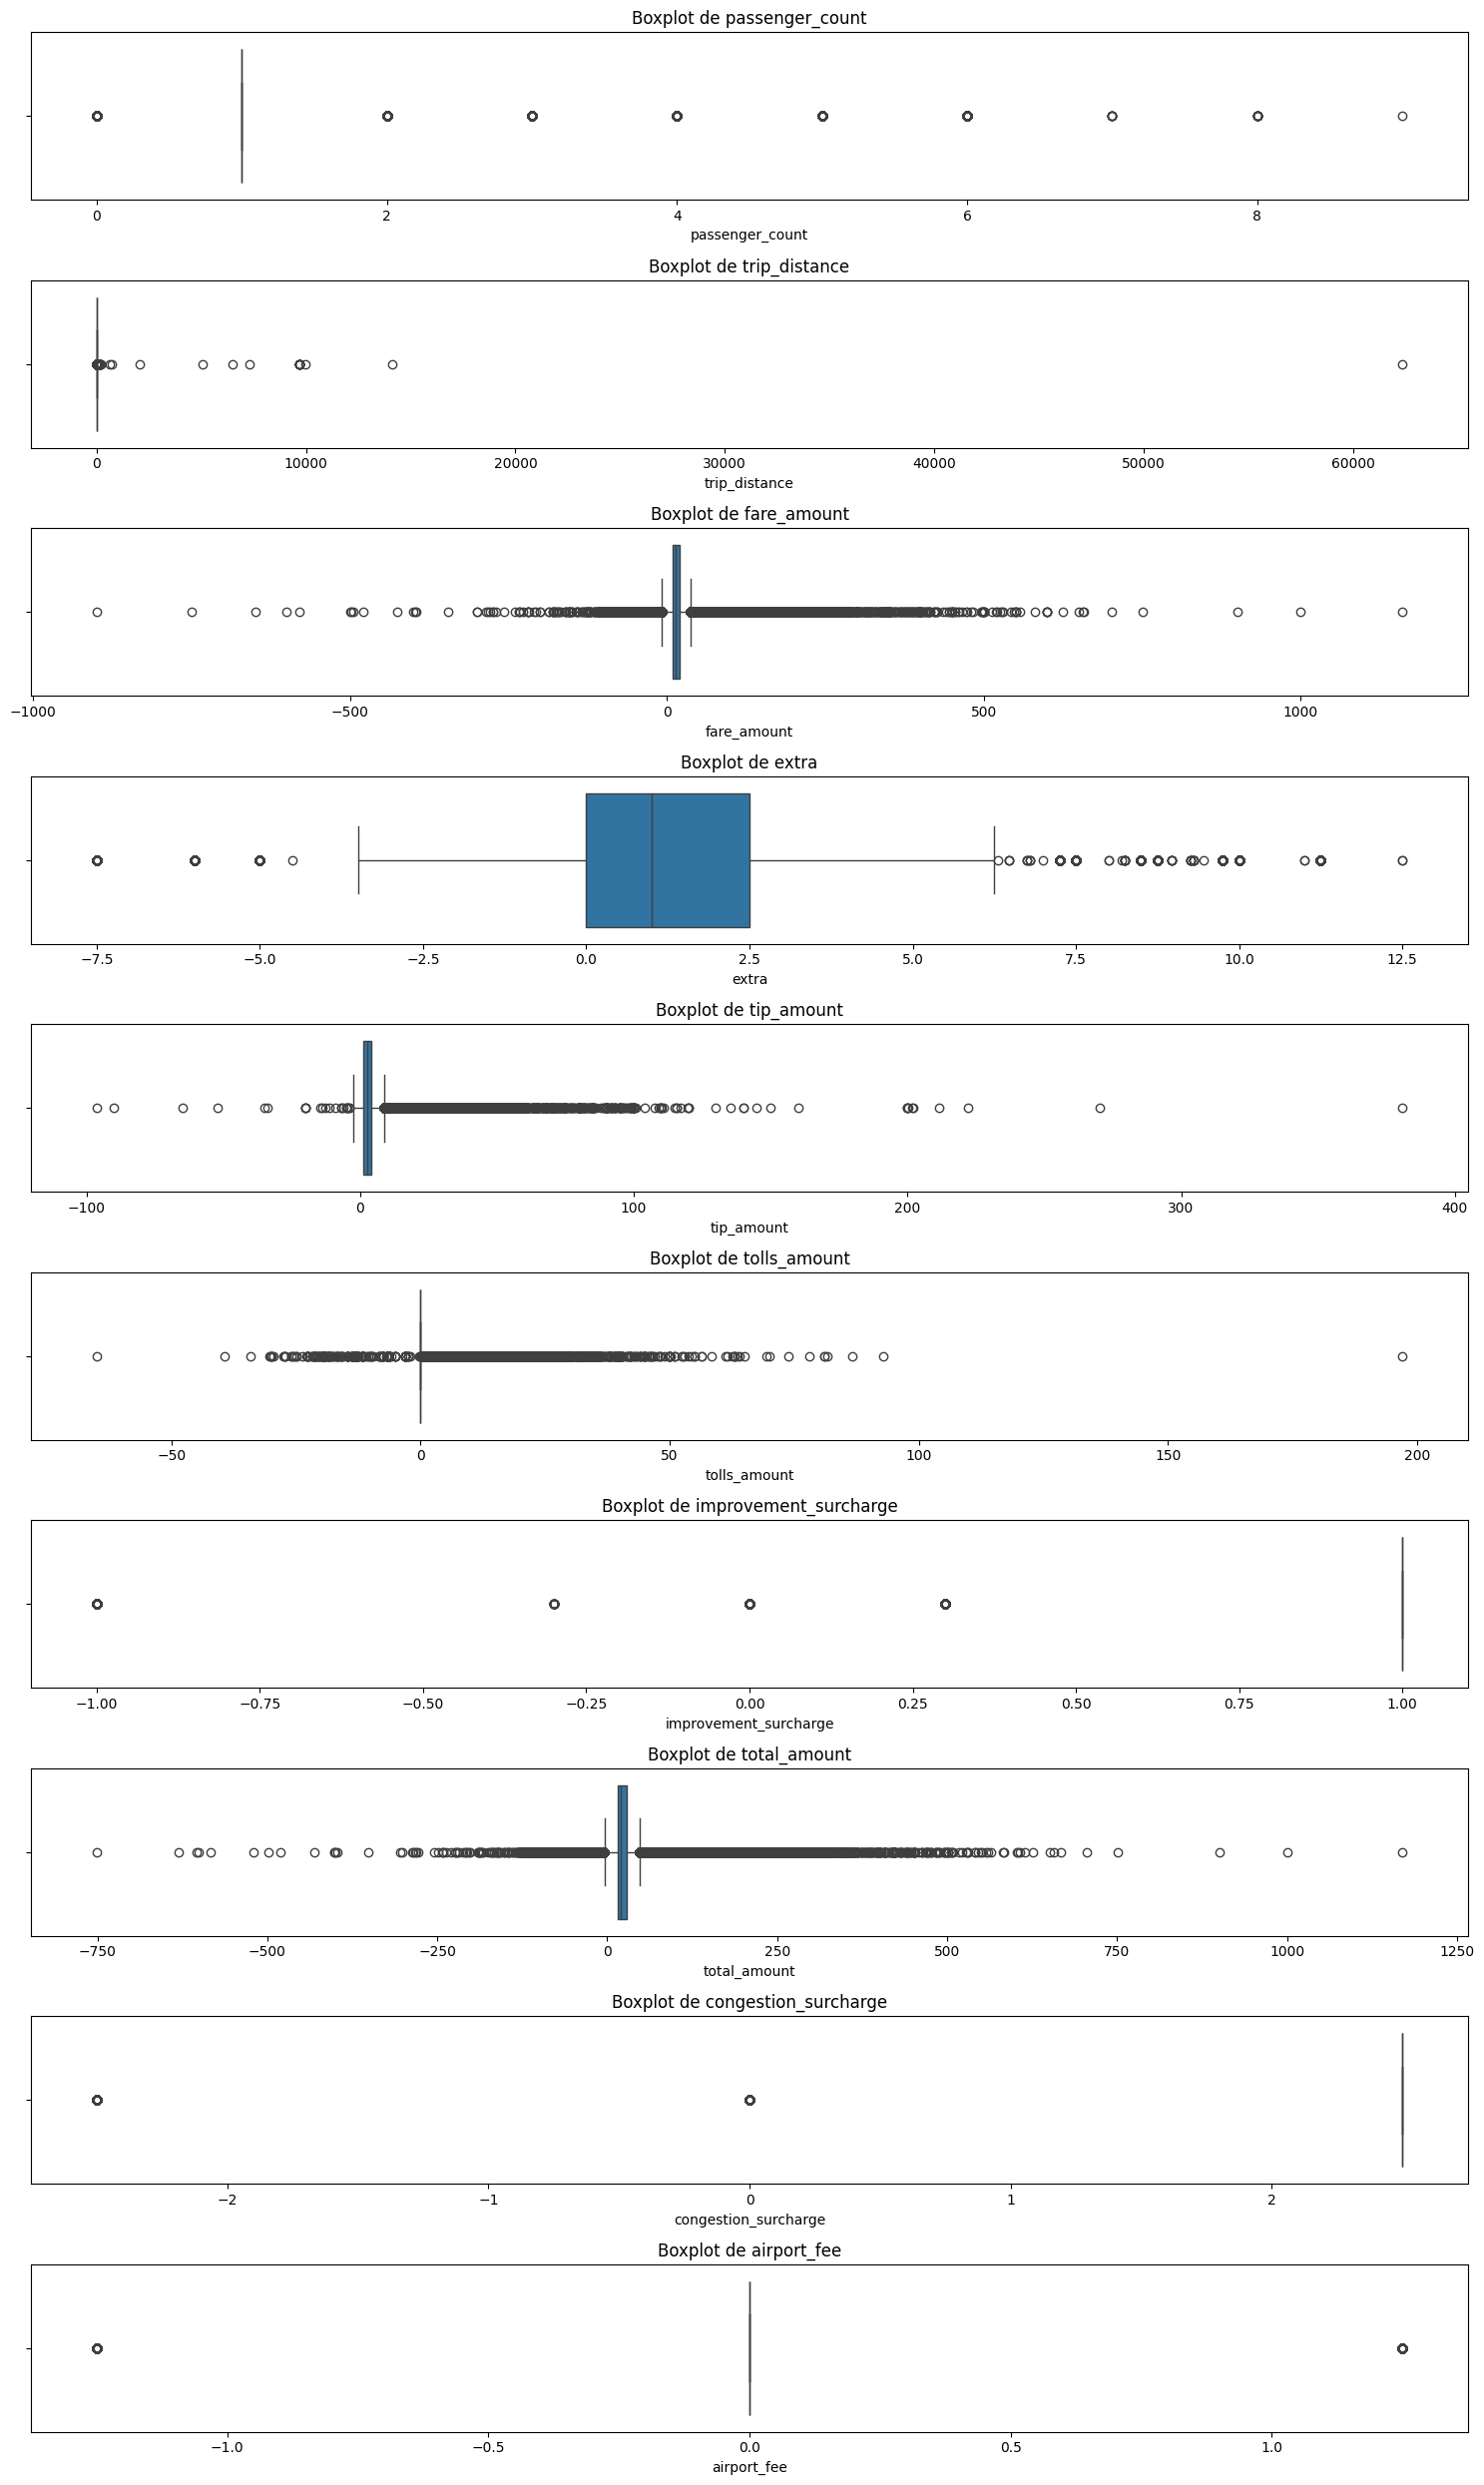

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas numéricas del dataset real para generar los boxplots
columnas_numericas = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'total_amount', 'congestion_surcharge', 'airport_fee']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 25))

# Crear un boxplot para cada variable numérica
for i, column in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i)
    sns.boxplot(x=taxi_data_clean[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

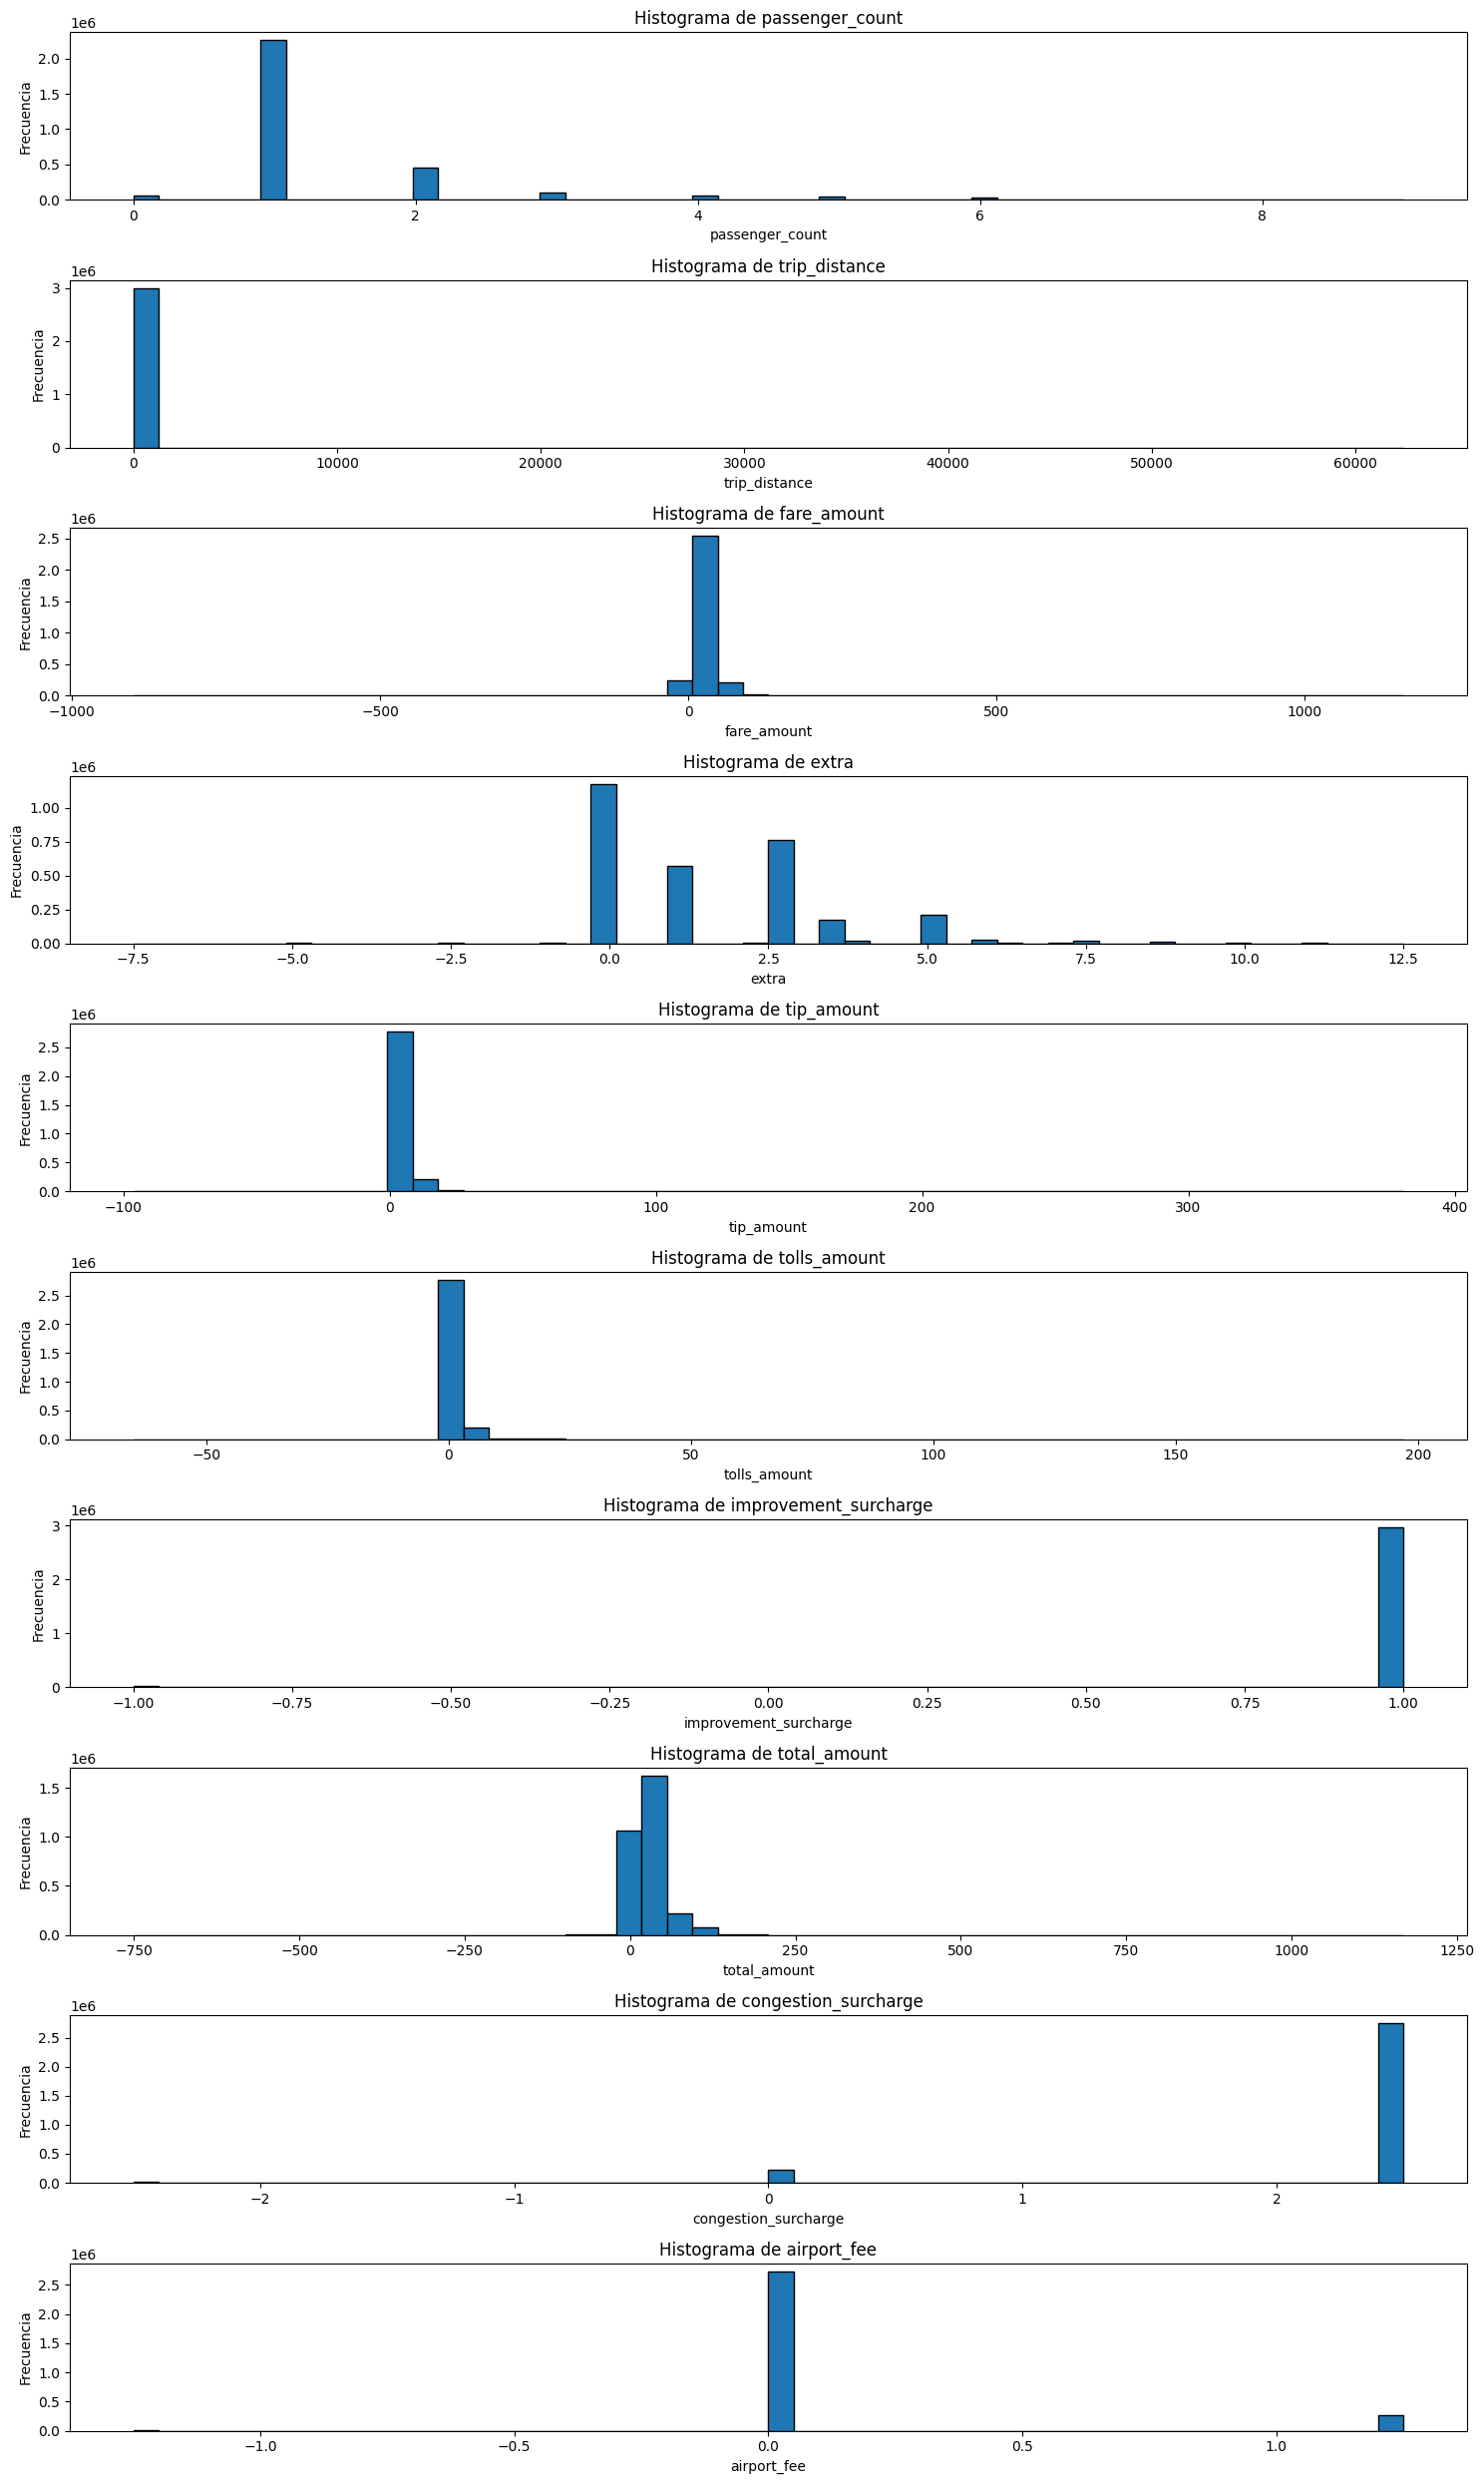

In [6]:
import matplotlib.pyplot as plt

# Crear histogramas para cada variable numérica
plt.figure(figsize=(15, 25))

for i, column in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i)
    plt.hist(taxi_data_clean[column], bins=50, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

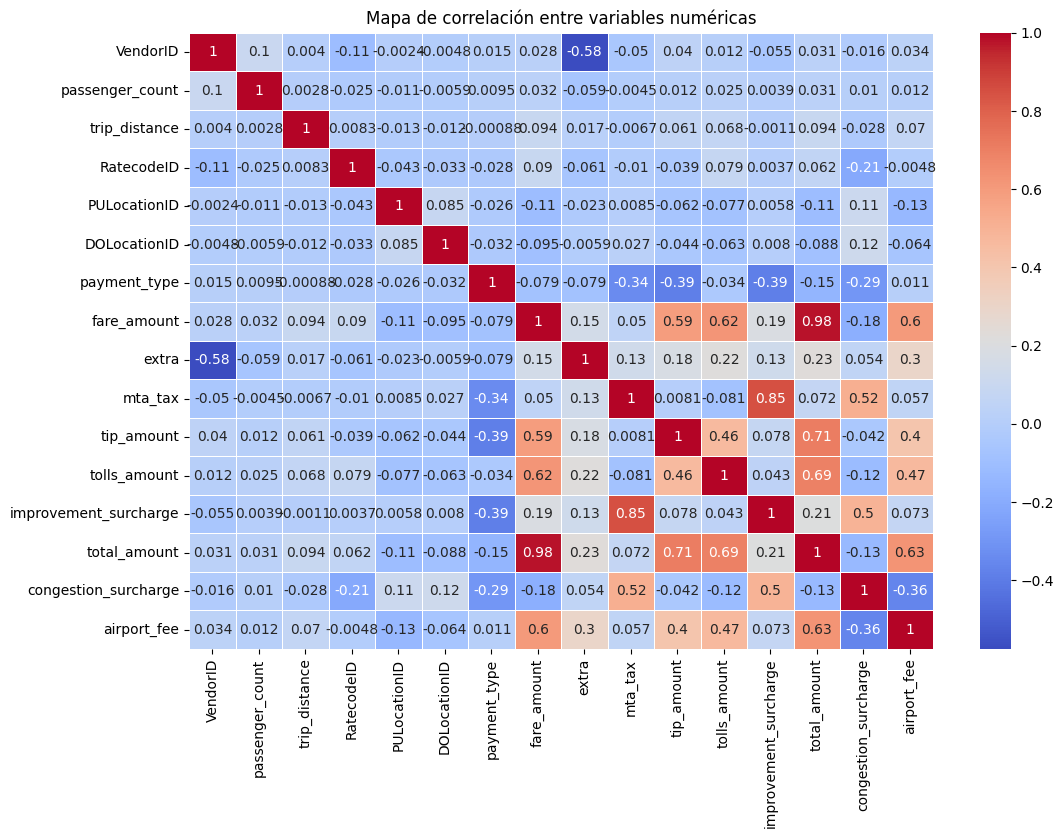

In [7]:
# Seleccionar solo las columnas numéricas
columnas_numericas = taxi_data_clean.select_dtypes(include=['float64', 'int64', 'int32'])

# Calcular la matriz de correlación
corr_matrix = columnas_numericas.corr()

# Crear el heatmap de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

In [8]:
taxi_data_clean.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

### Modelado

#### Modelo Base

In [30]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Seleccionar las variables independientes (X) y dependiente (y)
X = taxi_data_clean[['fare_amount', 'extra', 'tip_amount','tolls_amount','improvement_surcharge','airport_fee','congestion_surcharge','payment_type','PULocationID']]
y = taxi_data_clean['total_amount']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.8337804961793308
MAE: 0.6149930514053643


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Seleccionar las variables independientes (X) y dependiente (y)
X = taxi_data_clean[['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 
                     'improvement_surcharge', 'airport_fee', 'congestion_surcharge', 
                     'payment_type', 'PULocationID']]
y = taxi_data_clean['total_amount']

# Convertir las variables categóricas en dummies (variables ficticias)
X = pd.get_dummies(X, columns=['payment_type', 'PULocationID'], drop_first=True)

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Crear un escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento, y transformar los datos de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Realizar predicciones con los datos escalados
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.7839125805923497
MAE: 0.5568630931355962


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Seleccionar las variables independientes (X) y dependiente (y)
X = taxi_data_clean[['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 
                     'improvement_surcharge', 'airport_fee', 'congestion_surcharge', 
                     'payment_type', 'PULocationID']]
y = taxi_data_clean['total_amount']

# Convertir las variables categóricas en dummies (variables ficticias)
X = pd.get_dummies(X, columns=['payment_type', 'PULocationID'], drop_first=True)

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Crear un escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento, y transformar los datos de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Realizar predicciones con los datos escalados
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.783912580592365
MAE: 0.5568630931332869


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Seleccionar las variables independientes (X) y dependiente (y)
X = taxi_data_clean[['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 
                     'improvement_surcharge', 'airport_fee', 'congestion_surcharge', 
                     'payment_type', 'PULocationID']]
y = taxi_data_clean['total_amount']

# Convertir las variables categóricas en dummies
X = pd.get_dummies(X, columns=['payment_type', 'PULocationID'], drop_first=True)

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalar las variables numéricas
scaler = StandardScaler()

# Ajustar el escalador en los datos de entrenamiento y luego escalar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============== Ridge Regression ==============
# Crear el modelo Ridge con regularización (ajustar alpha según sea necesario)
ridge_model = Ridge(alpha=0.5)

# Entrenar el modelo Ridge con los datos escalados
ridge_model.fit(X_train_scaled, y_train)

# Realizar predicciones con Ridge
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluar el modelo Ridge
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"RMSE (Ridge): {rmse_ridge}")
print(f"MAE (Ridge): {mae_ridge}")

# ============== Lasso Regression ==============
# Crear el modelo Lasso con regularización (ajustar alpha según sea necesario)
lasso_model = Lasso(alpha=0.001)

# Entrenar el modelo Lasso con los datos escalados
lasso_model.fit(X_train_scaled, y_train)

# Realizar predicciones con Lasso
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluar el modelo Lasso
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"RMSE (Lasso): {rmse_lasso}")
print(f"MAE (Lasso): {mae_lasso}")

c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE (Ridge): 0.7839125986670697
MAE (Ridge): 0.5568629993174407
RMSE (Lasso): 0.7840374584351921
MAE (Lasso): 0.5561577818625322


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Definir los posibles valores de alpha
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Configurar la búsqueda de hiperparámetros
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
ridge_grid.fit(X_train_scaled, y_train)

# Mejor valor de alpha
print("Mejor alpha para Ridge:", ridge_grid.best_params_)

# Evaluar el mejor modelo
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f"RMSE con mejor alpha para Ridge: {rmse_ridge}")

Mejor alpha para Ridge: {'alpha': 1.0}
RMSE con mejor alpha para Ridge: 0.7839126169838224


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
from sklearn.linear_model import Lasso

# Definir los posibles valores de alpha
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Configurar la búsqueda de hiperparámetros
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
lasso_grid.fit(X_train_scaled, y_train)

# Mejor valor de alpha
print("Mejor alpha para Lasso:", lasso_grid.best_params_)

# Evaluar el mejor modelo
best_lasso_model = lasso_grid.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"RMSE con mejor alpha para Lasso: {rmse_lasso}")

Mejor alpha para Lasso: {'alpha': 0.001}
RMSE con mejor alpha para Lasso: 0.7840374584351921


c:\Users\jdvil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
